<h2 style = "color : Sky Blue"> Case Study - Lending Club </h2>

<h4 style = "color : Sky blue"> Data Understanding</h4>  


In [1]:
# Import the essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the CSV File

inp0 = pd.read_csv("loan.csv", low_memory=False) #low_memory option was recommended by the warning when importing the large dataset
inp0.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
#Initial Column Analysis

inp0.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [4]:
#Checking columns that are empty

Empty_Count = inp0.isnull().sum()
Empty_Columns = np.array(Empty_Count[Empty_Count==39717].index.tolist())
print(Empty_Columns)
len(Empty_Columns)

['mths_since_last_major_derog' 'annual_inc_joint' 'dti_joint'
 'verification_status_joint' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m'
 'open_il_6m' 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il'
 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m' 'max_bal_bc'
 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl' 'inq_last_12m'
 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy' 'bc_util'
 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op'
 'mo_sin_rcnt_tl' 'mort_acc' 'mths_since_recent_bc'
 'mths_since_recent_bc_dlq' 'mths_since_recent_inq'
 'mths_since_recent_revol_delinq' 'num_accts_ever_120_pd' 'num_actv_bc_tl'
 'num_actv_rev_tl' 'num_bc_sats' 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl'
 'num_rev_accts' 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m'
 'num_tl_30dpd' 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'tot_hi_cred_lim' 'total_bal_ex_mort' 'total_bc_limit'
 'total_il_high_credit_limit']


54

In [5]:
#Analyzing subset to determine variable types in the non-empty columns

Non_Empty_Columns = np.array(Empty_Count[Empty_Count<39717].index.tolist())
pd.set_option('display.max_columns', None) #To view all columns vs default
inp0[Non_Empty_Columns].head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

##### The Dataset has the following characteristics:
- 111 Columns
    - Float Variables - 74
    - Int Variables - 13
    - String/Object Variables - 24
    

- 54 of these columns contain null values and can be omitted in the next step: 
    - *['mths_since_last_major_derog' 'annual_inc_joint' 'dti_joint'
 'verification_status_joint' 'tot_coll_amt' 'tot_cur_bal' 'open_acc_6m'
 'open_il_6m' 'open_il_12m' 'open_il_24m' 'mths_since_rcnt_il'
 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m' 'max_bal_bc'
 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl' 'inq_last_12m'
 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy' 'bc_util'
 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op' 'mo_sin_rcnt_rev_tl_op'
 'mo_sin_rcnt_tl' 'mort_acc' 'mths_since_recent_bc'
 'mths_since_recent_bc_dlq' 'mths_since_recent_inq'
 'mths_since_recent_revol_delinq' 'num_accts_ever_120_pd' 'num_actv_bc_tl'
 'num_actv_rev_tl' 'num_bc_sats' 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl'
 'num_rev_accts' 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m'
 'num_tl_30dpd' 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'tot_hi_cred_lim' 'total_bal_ex_mort' 'total_bc_limit'
 'total_il_high_credit_limit']*

- 39717 rows or entries 

- **Variables Types(non-Empty Columns):**
    - **Ordered Categorical:** *grade, sub_grade, emp_length, issue_d, zip_code, earliest_cr_line, inq_last_6mths, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d*
    - **Unordered Categorical:** *id, member_id, emp_title, home_ownership, verification_status, loan_status, pymnt_plan, url, purpose, title, addr_state, initial_list_status, policy_code, application_type, acc_now_delinq*


    - **Numerical Variables (non-Empty Columns):** *loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, Installment, annual_inc, dti, delinq_2yrs, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, 
collections_12_mths_ex_med, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens*



### Data Cleaning
    - We can start with removing columns with only null values
    

In [6]:
#Narrow down to non-null columns

LoanData1 = inp0[Non_Empty_Columns]
LoanData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

##### Looking for columns with high percentage of missing data

In [7]:
missing_per = LoanData1.isnull().sum()/len(LoanData1)*100
missing_cols = pd.Series(missing_per, index=LoanData1.columns)
missing_cols[missing_cols > 0].sort_values(ascending=False)

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

##### Based on the above we can drop the columns *next_pymnt_d, mths_since_last_record and mths_since_last_delinq*

In [8]:
# Dropping any Columns with missing percentage larger than 60
LoanData2 = LoanData1.drop(missing_cols[missing_cols > 60].index, axis=1)

In [9]:
#Finding partially empty columns that might need further Imputation

Partial_Emp = LoanData2.isnull().sum()
PartialE_Colm = np.array(Partial_Emp[Partial_Emp > 0].index.tolist())
LoanData2[PartialE_Colm].head()





emp_title emp_length  \
0                       NaN  10+ years   
1                     Ryder   < 1 year   
2                       NaN  10+ years   
3       AIR RESOURCES BOARD  10+ years   
4  University Medical Group     1 year   

                                                desc                 title  \
0    Borrower added on 12/22/11 > I need to upgra...              Computer   
1    Borrower added on 12/22/11 > I plan to use t...                  bike   
2                                                NaN  real estate business   
3    Borrower added on 12/21/11 > to pay for prop...              personel   
4    Borrower added on 12/21/11 > I plan on combi...              Personal   

  revol_util last_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
0     83.70%       Jan-15             May-16                         0.0   
1      9.40%       Apr-13             Sep-13                         0.0   
2     98.50%       Jun-14             May-16                         0.0   
3        21%       Jan-15             Apr-16                         0.0   
4     53.90%       May-16             May-16                         0.0   

   chargeoff_within_12_mths  pub_rec_bankruptcies  tax_liens  
0                       0.0                   0.0        0.0  
1                       0.0                   0.0        0.0  
2                       0.0                   0.0        0.0  
3                       0.0                   0.0        0.0  
4                       0.0                   0.0        0.0

#### Working through the Columns by order of missing values

- desc - The empty values here can be replaced with 'Other' as this is a description field and can't be easily substituted 
- emp_title - As again here the employer is unknown its better to leave empty columns as 'Other' value
- emp_length - Based on a similar age group a median value can be substituted
- title - As this is a categorical field it is better to replace empty values here with 'Other' too
- revol_util - Drop as this would be a Customer Behavior Variable 
- last_pymnt_d - Drop as this would be a Customer Behavior Variable 
- last_credit_pull_d - Drop as this would be a Customer Behavior Variable 
- collections_12_mths_ex_med - Taking mean value - 0
- chargeoff_within_12_mths - Taking mean value - 0
- pub_rec_bankruptcies - Taking mean value - 0
- tax_liens - Taking mean value - 0


In [10]:
LoanData2["collections_12_mths_ex_med"].mean()

0.0

In [11]:
LoanData2["chargeoff_within_12_mths"].mean()

0.0

In [12]:
LoanData2["pub_rec_bankruptcies"].mean()

0.04325986673500769

In [13]:
LoanData2["tax_liens"].mean()

0.0

In [14]:
#Checking diffent entries in the emp_length column
LoanData2['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [15]:
#The following can be replaced " year",' Years', '<', '+'
#LoanData2.emp_length.apply(lambda x: (x.replace('<','')).replace('+',''))
# Attempting to replace fails as the column contains null values. To work around this we can treat the empty value replacement similar to other strings. Replace with "Unknown"

##### As most of the empty value replacements are constant so far we can utilize a function to optimize this

- desc - 'Other'
- emp_title - 'Other'
- emp_length - "Unknown" 
- title - 'Other'
- collections_12_mths_ex_med - 0
- chargeoff_within_12_mths - 0
- pub_rec_bankruptcies - 0
- tax_liens - 0

In [16]:
#Define function to replace missing values 

def missing_val_upd(df, col_n, new_val):
    new_df = df[col_n].fillna(new_val)
    return new_df

#Apply function for the columns highlighted earlier
LoanData2.desc = missing_val_upd(LoanData2, "desc", "Other")
LoanData2.emp_title = missing_val_upd(LoanData2, "emp_title", "Other")
LoanData2.emp_length = missing_val_upd(LoanData2, "emp_length", "Unknown")
LoanData2.title = missing_val_upd(LoanData2, "title", "Other")
LoanData2.collections_12_mths_ex_med = missing_val_upd(LoanData2, "collections_12_mths_ex_med", 0)
LoanData2.chargeoff_within_12_mths = missing_val_upd(LoanData2, "chargeoff_within_12_mths", 0)
LoanData2.pub_rec_bankruptcies = missing_val_upd(LoanData2, "pub_rec_bankruptcies", 0)
LoanData2.tax_liens = missing_val_upd(LoanData2, "tax_liens", 0)

LoanData2.isnull().sum().sort_values(ascending=False).head()




last_pymnt_d          71
revol_util            50
last_credit_pull_d     2
id                     0
total_rec_int          0
dtype: int64

##### We now drop the columns that are Customer behaviour variables


In [17]:
#Store all the Customer behaviour variables in an array

cx_behavior_vars = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

#Dropping the columns
LoanData2 = LoanData2.drop(cx_behavior_vars, axis=1)
LoanData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   39717 non-null  object 
 11  emp_length                  39717 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [18]:
LoanData2.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                     Other  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                     Other  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                              Other  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti initial_list_status  \
0              Computer    860xx         AZ  27.65                   f   
1                  bike    309xx         GA   1.00                   f   
2  real estate business    606xx         IL   8.72                   f   
3              personel    917xx         CA  20.00                   f   
4              Personal    972xx         OR  17.94                   f   

   collections_12_mths_ex_med  policy_code  acc_now_delinq  \
0                         0.0            1               0   
1                         0.0            1               0   
2                         0.0            1               0   
3                         0.0            1               0   
4                         0.0            1               0   

   chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  
0                       0.0            0                   0.0        0.0  
1                       0.0            0                   0.0        0.0  
2                       0.0            0                   0.0        0.0  
3                       0.0            0                   0.0        0.0  
4                       0.0            0                   0.0        0.0

##### Drop Columns with equal data for all rows

In [19]:
#Find the number of unique items per column
Columns_ucount = LoanData2.nunique()
Non_Unique_Columns = LoanData2.columns[Columns_ucount == 1]
LoanData2[Non_Unique_Columns] #quick validation for the columns picked

pymnt_plan initial_list_status  collections_12_mths_ex_med  policy_code  \
0              n                   f                         0.0            1   
1              n                   f                         0.0            1   
2              n                   f                         0.0            1   
3              n                   f                         0.0            1   
4              n                   f                         0.0            1   
...          ...                 ...                         ...          ...   
39712          n                   f                         0.0            1   
39713          n                   f                         0.0            1   
39714          n                   f                         0.0            1   
39715          n                   f                         0.0            1   
39716          n                   f                         0.0            1   

       acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  tax_liens  
0                   0                       0.0            0        0.0  
1                   0                       0.0            0        0.0  
2                   0                       0.0            0        0.0  
3                   0                       0.0            0        0.0  
4                   0                       0.0            0        0.0  
...               ...                       ...          ...        ...  
39712               0                       0.0            0        0.0  
39713               0                       0.0            0        0.0  
39714               0                       0.0            0        0.0  
39715               0                       0.0            0        0.0  
39716               0                       0.0            0        0.0  

[39717 rows x 8 columns]

In [20]:
#Pick only columns with more than 1 unique value

Unique_Cols = LoanData2.columns[Columns_ucount > 1]
LoanData2 = LoanData2[Unique_Cols]

In [21]:
#URL column can be dropped too as it just references the id column as a URL
LoanData3 = LoanData2.drop('url',axis=1)
LoanData3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             39717 non-null  object 
 11  emp_length            39717 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  issue_d            

In [22]:
LoanData3.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                     Other  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                     Other  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                              Other  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  pub_rec_bankruptcies  
0              Computer    860xx         AZ  27.65                   0.0  
1                  bike    309xx         GA   1.00                   0.0  
2  real estate business    606xx         IL   8.72                   0.0  
3              personel    917xx         CA  20.00                   0.0  
4              Personal    972xx         OR  17.94                   0.0

##### We can now focus on converting some of the columns to usable data/data types:
    - Term - Removing " months" can help convert this into an int value
    - int_rate - Removing "%" again allows converting into an useful float vs object value
    - Emp_length - Removing special characters including + allows to again treat the row as an int value
    - Issue_d - Converting the type to Date

In [23]:
# Removing "Months" from Term
LoanData3.term = LoanData3.term.apply(lambda x: int(x.replace(' months','')))

In [24]:
# Remove " %" from int_rate
LoanData3.int_rate = LoanData3.int_rate.apply(lambda x: float(x.replace('%','')))

In [25]:
#The following can be replaced " year",' Years', '<', '+'
LoanData3.emp_length = LoanData3.emp_length.apply(lambda x: (((x.replace('<','')).replace('+','')).replace(' years','')).replace(' year',''))


In [26]:
#We can replace the "Unknown" entries with the mean value
emp_length_mean = (LoanData3.emp_length[~(LoanData3.emp_length == "Unknown")])
emp_length_mean.astype("int32").mean()

5.092050100926453

In [27]:
# We can now replace the missing values with the mean 5
LoanData3.emp_length = LoanData3.emp_length.apply(lambda x: int(x.replace('Unknown','5')))

In [28]:
# Converting "issue_d" to Date time
LoanData3.issue_d = pd.to_datetime(LoanData3['issue_d'], format='%b-%y')

In [29]:
LoanData3.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0    36   
1  1077430    1314167       2500         2500           2500.0    60   
2  1077175    1313524       2400         2400           2400.0    36   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   

   int_rate  installment grade sub_grade                 emp_title  \
0     10.65       162.87     B        B2                     Other   
1     15.27        59.83     C        C4                     Ryder   
2     15.96        84.33     C        C5                     Other   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD   
4     12.69        67.79     B        B5  University Medical Group   

   emp_length home_ownership  annual_inc verification_status    issue_d  \
0          10           RENT     24000.0            Verified 2011-12-01   
1           1           RENT     30000.0     Source Verified 2011-12-01   
2          10           RENT     12252.0        Not Verified 2011-12-01   
3          10           RENT     49200.0     Source Verified 2011-12-01   
4           1           RENT     80000.0     Source Verified 2011-12-01   

   loan_status                                               desc  \
0   Fully Paid    Borrower added on 12/22/11 > I need to upgra...   
1  Charged Off    Borrower added on 12/22/11 > I plan to use t...   
2   Fully Paid                                              Other   
3   Fully Paid    Borrower added on 12/21/11 > to pay for prop...   
4      Current    Borrower added on 12/21/11 > I plan on combi...   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [30]:
#Confirming we have no duplicates
LoanData3.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39717 non-null  int64         
 1   member_id             39717 non-null  int64         
 2   loan_amnt             39717 non-null  int64         
 3   funded_amnt           39717 non-null  int64         
 4   funded_amnt_inv       39717 non-null  float64       
 5   term                  39717 non-null  int64         
 6   int_rate              39717 non-null  float64       
 7   installment           39717 non-null  float64       
 8   grade                 39717 non-null  object        
 9   sub_grade             39717 non-null  object        
 10  emp_title             39717 non-null  object        
 11  emp_length            39717 non-null  int64         
 12  home_ownership        39717 non-null  object        
 13  annual_inc      

### Data Analysis

#### Univariate Analysis

Lets take a look at unordered variables to determine thier relation if any

In [31]:
# Looking for if we have a common pattern with Emp_Title. 
LoanData3[LoanData3.emp_title!='Other'].emp_title.value_counts()

#However, this returns 28819 unique names some of which there is a good chance of misspelling but would likely still result in a large number even when fixed

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28819, dtype: int64

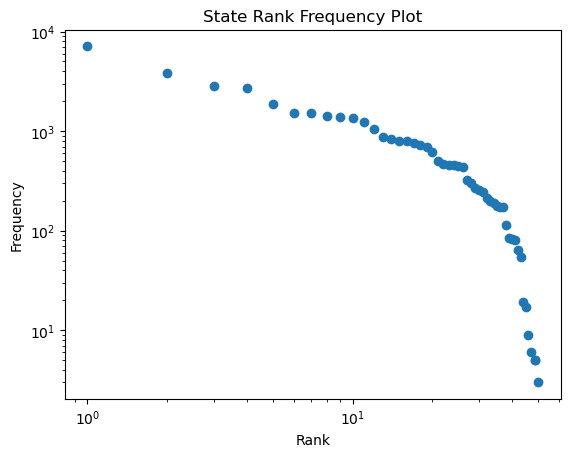

In [32]:
#Attempting to look for a pattern by state
state_val = LoanData3[LoanData3.addr_state!='Other'].addr_state.value_counts()
state_rank = state_val.rank(ascending=False)
state_rank
plt.plot(state_rank, state_val, 'o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('State Rank Frequency Plot')
plt.show()

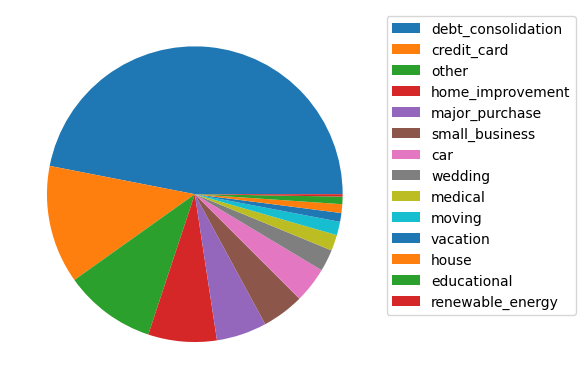

In [33]:
#Checking the distribution by purpose
purpose_uni = LoanData3.purpose.value_counts()

plt.pie(purpose_uni)
plt.legend(purpose_uni.index, bbox_to_anchor=(1, 1)) #moving position for legend to prevent overlap
plt.show()


We can infer that a vast majority tend to take the loan towards debt consolidation which can also be combined with the next leading purpose - Credit card

##### Now, checking on ordered variables

<AxesSubplot:>

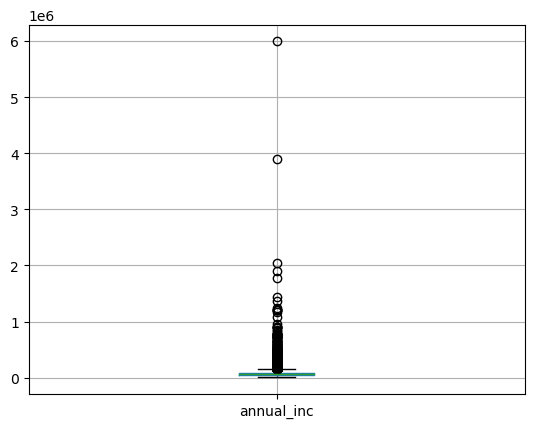

In [34]:
#Checking Annual Income. We can use a box plot here to check for outliers
LoanData3.boxplot('annual_inc')

In [115]:
LoanData3[LoanData3.annual_inc < 200000].annual_inc.describe()


count     39009.000000
mean      64376.580921
std       32892.640958
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80000.000000
max      199992.000000
Name: annual_inc, dtype: float64

Text(0.5, 1.0, 'Annual Income Range')

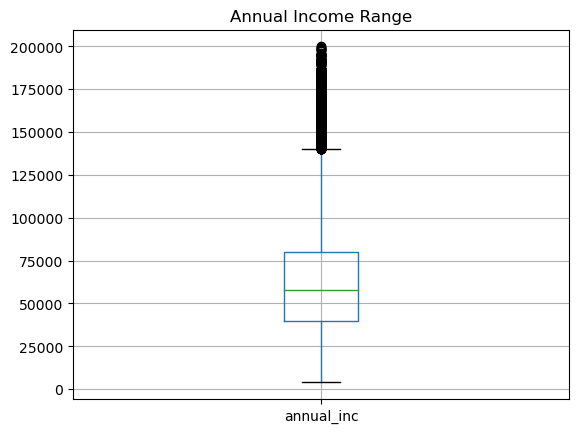

In [35]:
#Based on the above we can narrow this down to people who earn less than 200k
LoanData3[LoanData3.annual_inc < 200000].boxplot('annual_inc')
plt.title('Annual Income Range')

#The upper limit appears to be close to 130k

C:\Users\M\AppData\Local\Temp\ipykernel_10376\1583577590.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  GenLoanData = GenLoanData[(LoanData3.loan_status != 'Current')]


Text(0.5, 1.0, 'Annual Income Distribution')

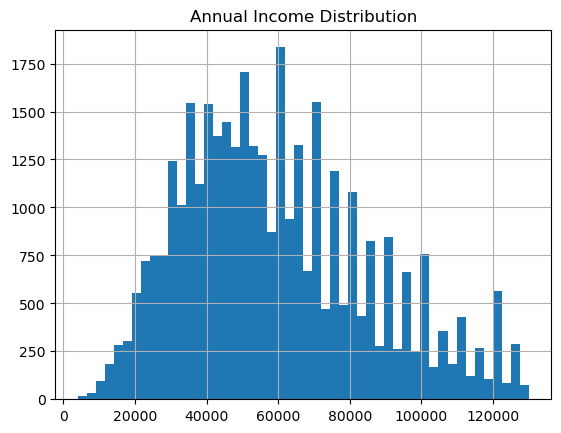

In [36]:
#Based on this we can look at a rough distribution and narrow this down to 90% of our dataset excluding the outlier to draw some additional conclusions

GenLoanData = LoanData3[LoanData3.annual_inc < 130000]

#We can also take away the loans that are current which might not give us a good enough insight
GenLoanData = GenLoanData[(LoanData3.loan_status != 'Current')]

GenLoanData.annual_inc.hist(bins=50)
plt.title('Annual Income Distribution')


Text(0.5, 1.0, 'Employment Length')

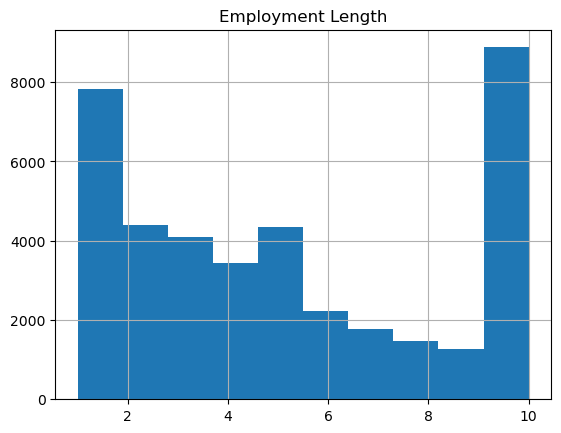

In [37]:
#Employment duration
LoanData3.emp_length.hist(bins=10)
plt.title('Employment Length')

# It appears a good part of the customers are either freshers or in the experienced range. This might come in useful later when we're attempting to analyze a co-relation


#### We can infer that the median income of 90% of the demographic is ~60k

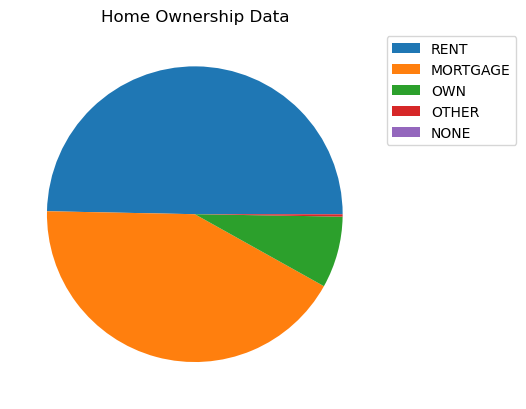

In [38]:
#Home Ownership data 
HomeOwnership_count = GenLoanData.home_ownership.value_counts()

plt.pie(HomeOwnership_count)
plt.legend(HomeOwnership_count.index, bbox_to_anchor=(1, 1)) #moving position for legend to prevent overlap
plt.title("Home Ownership Data")
plt.show()

#### We can infer that about 50% live in rented accomodatation while the remainder who own are likely to be still have these properties under a mortgage

Text(0.5, 1.0, 'Interest Rate distribution')

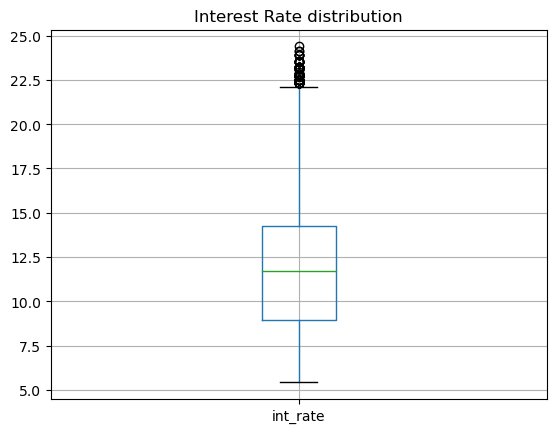

In [39]:
#Median Interest Rate
GenLoanData.boxplot('int_rate')
plt.title('Interest Rate distribution')


##### There are a few high interest outliers. We might be able to derive some additional insights from these over the types of loans around these when performing bivariate

In [40]:
#Looking at those with past bankruptcies
GenLoanData.pub_rec_bankruptcies.value_counts()

0.0    34363
1.0     1578
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

c:\Users\M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


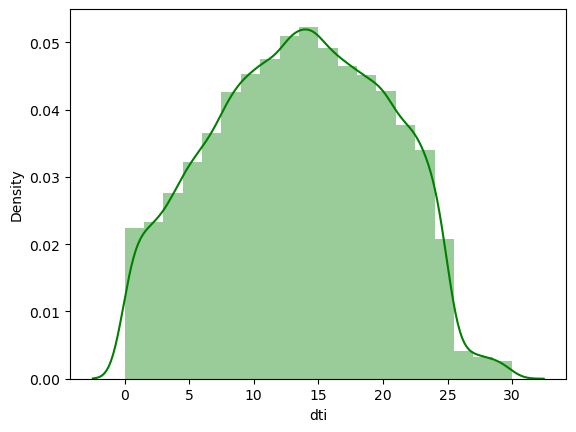

In [41]:
# Analyzing the DTI ratio
sns.distplot(GenLoanData.dti, bins=20, color='g')
plt.show()

##### A good part have a healthy 15% DTI

In [42]:
# A quick check on the Term duration
GenLoanData.term.value_counts()

36    27226
60     8720
Name: term, dtype: int64

## Segmented Univariate Analysis

In [43]:
# Grouping by state
state_group = GenLoanData.groupby("addr_state")

In [44]:
#Checking for income stats
state_group_inc = state_group.annual_inc.describe().round().astype(int)

#Top customer earning demographic by state
stateincc = state_group_inc.sort_values(by='count',ascending=False).head(10)

stateincc.style.background_gradient(cmap="Greens", subset='count', axis=None)

In [45]:
#Checking for states with a good median income

stateincm = state_group_inc.sort_values(by='mean',ascending=False).head(10)
stateincm.style.background_gradient(cmap="Greens", subset='mean', axis=1)


# performing this for loan amounts by state gives a similar result

In [46]:
# Checking for Purpose title unique counts

GenLoanData.title.value_counts()

Debt Consolidation         1944
Debt Consolidation Loan    1501
Personal Loan               600
Consolidation               445
debt consolidation          442
                           ... 
De Cheaper Trash              1
7300                          1
Timeshare Loan                1
My Relief                     1
MBA Loan Consolidation        1
Name: title, Length: 18184, dtype: int64

As the purpose title ends up as a large set we might not be able to use it. We can instead use Purpose (Primary Category)

In [47]:
# Grouping by Purpose
purpose_group = GenLoanData.groupby("purpose")

#Checking for loan stats
purpose_group_ln = purpose_group.funded_amnt.describe().round().astype(int)

#Top average loans by purpose
purposefunded = purpose_group_ln.sort_values(by='mean',ascending=False)

purposefunded.style.background_gradient(cmap="Blues", axis=1)

In [48]:
# Grouping by Employment Length
EmploymentL_group = GenLoanData.groupby("emp_length")

#Checking for loan stats
EmploymentL_group_ln = EmploymentL_group.funded_amnt.describe().round().astype(int)

#Top average loans by Employment Length
EmploymentLfunded = EmploymentL_group_ln.sort_values(by='mean',ascending=False)

EmploymentLfunded.style.background_gradient(cmap="Blues", axis=1)

In [49]:
# Grouping by Verification Status
Ver_group = GenLoanData.groupby("verification_status")

#Checking for loan stats
Ver_group.loan_status.value_counts()



verification_status  loan_status
Not Verified         Fully Paid     14017
                     Charged Off     2079
Source Verified      Fully Paid      7620
                     Charged Off     1360
Verified             Fully Paid      8963
                     Charged Off     1907
Name: loan_status, dtype: int64

Going by the total percentage we don't find any higher charge offs for not verified vs the others.

In [50]:
GenLoanData.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0    36   
1  1077430    1314167       2500         2500           2500.0    60   
2  1077175    1313524       2400         2400           2400.0    36   
3  1076863    1277178      10000        10000          10000.0    36   
5  1075269    1311441       5000         5000           5000.0    36   

   int_rate  installment grade sub_grade             emp_title  emp_length  \
0     10.65       162.87     B        B2                 Other          10   
1     15.27        59.83     C        C4                 Ryder           1   
2     15.96        84.33     C        C5                 Other          10   
3     13.49       339.31     C        C1   AIR RESOURCES BOARD          10   
5      7.90       156.46     A        A4  Veolia Transportaton           3   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01   Fully Paid   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                              Other  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                              Other         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   pub_rec_bankruptcies  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
5                   0.0

### Bivariate Analysis

- We can attempt to find a correlation using a heatmap

In [51]:
GenLoanData.loan_status.value_counts()

Fully Paid     30600
Charged Off     5346
Name: loan_status, dtype: int64

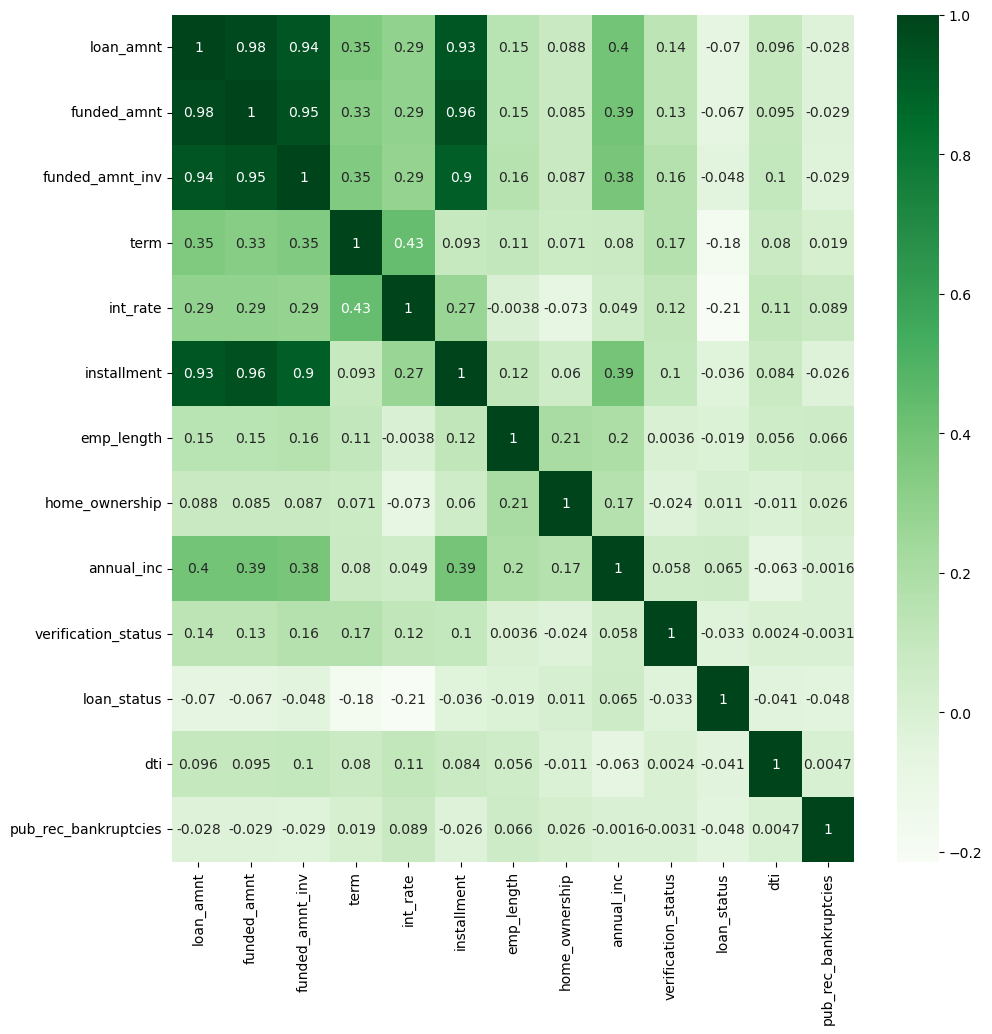

In [52]:
#Attempting to plot a heatmap
genHmap = GenLoanData

#Dropping columns id and member_id
genHmap = GenLoanData.drop(columns=['id','member_id'])

#We can add in factors like home Ownership, Verification Status and loan status into numerical values
Home_dict = {'RENT':0, 'OTHER':0, 'NONE':0, 'MORTGAGE':1, 'OWN':2}
genHmap.home_ownership = genHmap.home_ownership.replace(Home_dict)

#Defining for Verification Status
Ver_dict = {'Not Verified':0, 'Verified':1, 'Source Verified':2}
genHmap.verification_status = genHmap.verification_status.replace(Ver_dict)

#Defining for loan Status
loan_dict = {'Fully Paid':1, 'Charged Off':0}
genHmap.loan_status = genHmap.loan_status.replace(loan_dict)

#genHmap = GenLoanData[:,'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'pub_rec_bankruptcies']
plt.figure(figsize=(11, 11))
sns.heatmap(genHmap.corr(), cmap='Greens',annot = True)

plt.show()

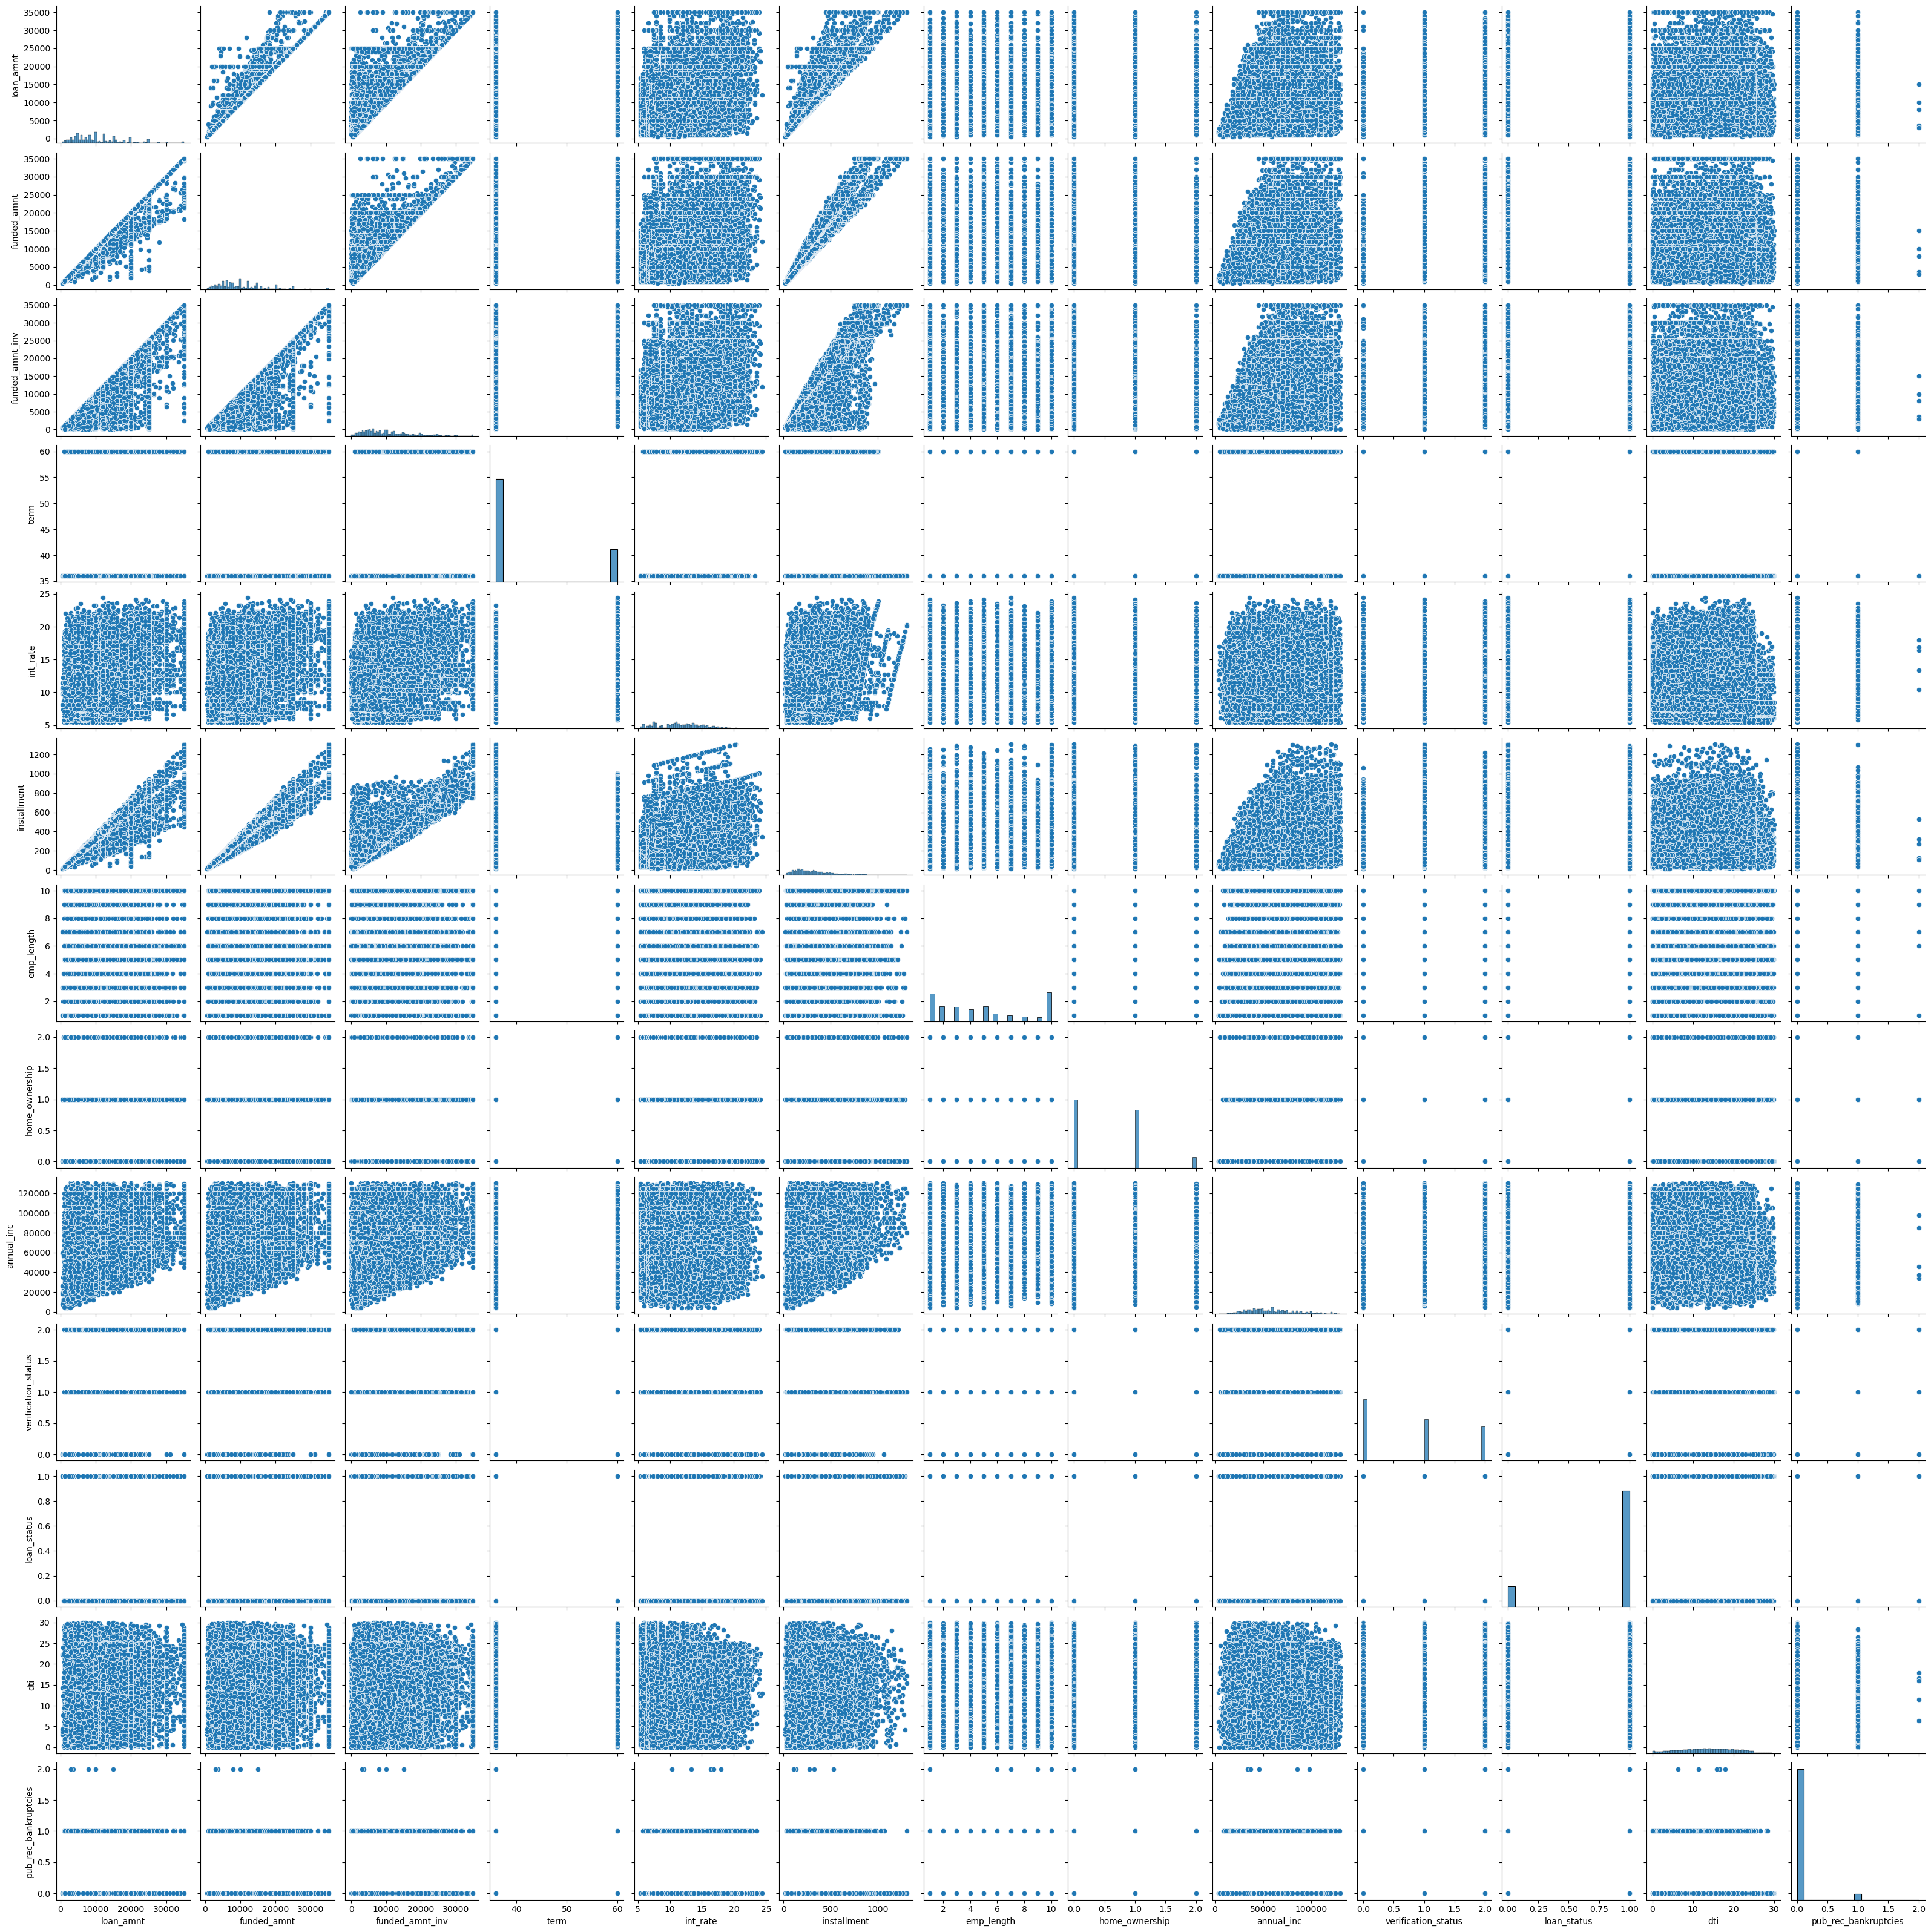

In [53]:
# Testing on a pair plot
sns.pairplot(genHmap)
plt.show()

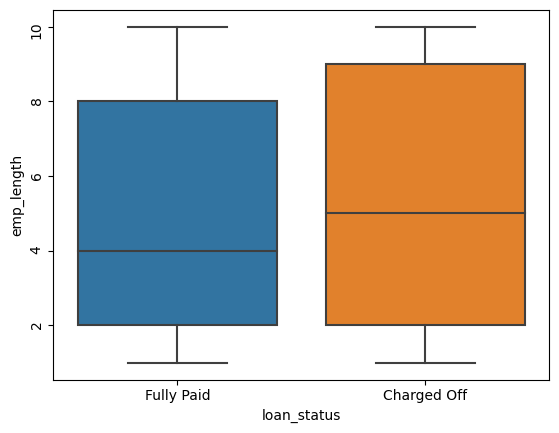

In [108]:
# 


purposeinterestplot = sns.boxplot(x='loan_status', y='emp_length', data=GenLoanData)

for label in purposeinterestplot.get_yticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('right')
    label.set_position((0, label.get_position()[1]))
    
plt.show()

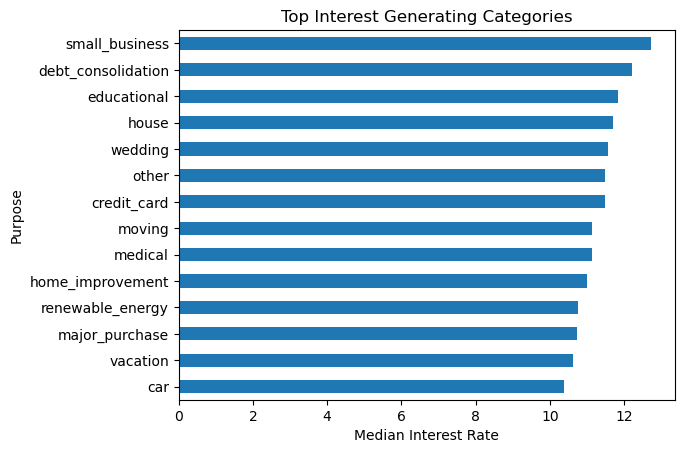

In [84]:
Genint_purpose = GenLoanData.groupby(['purpose'])['int_rate'].median().sort_values()

pi_plot = Genint_purpose.plot.barh()
pi_plot.set_xlabel('Median Interest Rate')
pi_plot.set_ylabel('Purpose')
pi_plot.set_title('Top Interest Generating Categories')

plt.show()

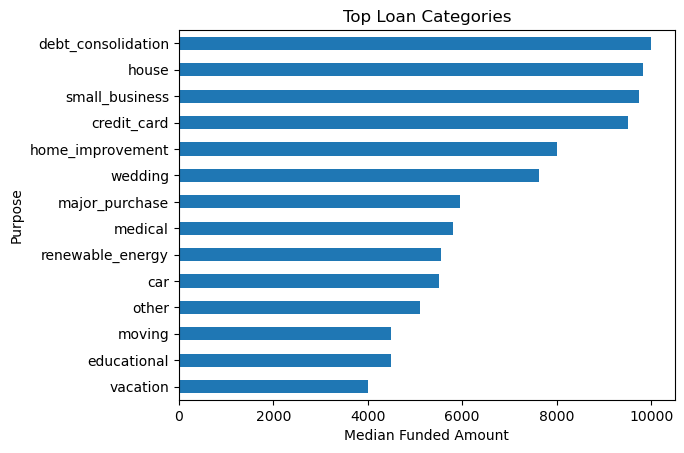

In [85]:
Genloan_purpose = GenLoanData.groupby(['purpose'])['funded_amnt_inv'].median().sort_values()

pl_plot = Genloan_purpose.plot.barh()
pl_plot.set_xlabel('Median Funded Amount')
pl_plot.set_ylabel('Purpose')
pl_plot.set_title('Top Loan Categories')

plt.show()

### Derived Columns



In [100]:
#Creating Loan Month and Year column

GenLoanData['LoanMonth'] = GenLoanData.issue_d.dt.month
GenLoanData['Year'] = GenLoanData.issue_d.dt.year

GenLoanData.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0    36   
1  1077430    1314167       2500         2500           2500.0    60   
2  1077175    1313524       2400         2400           2400.0    36   
3  1076863    1277178      10000        10000          10000.0    36   
5  1075269    1311441       5000         5000           5000.0    36   

   int_rate  installment grade sub_grade             emp_title  emp_length  \
0     10.65       162.87     B        B2                 Other          10   
1     15.27        59.83     C        C4                 Ryder           1   
2     15.96        84.33     C        C5                 Other          10   
3     13.49       339.31     C        C1   AIR RESOURCES BOARD          10   
5      7.90       156.46     A        A4  Veolia Transportaton           3   

  home_ownership  annual_inc verification_status    issue_d  loan_status  \
0           RENT     24000.0            Verified 2011-12-01   Fully Paid   
1           RENT     30000.0     Source Verified 2011-12-01  Charged Off   
2           RENT     12252.0        Not Verified 2011-12-01   Fully Paid   
3           RENT     49200.0     Source Verified 2011-12-01   Fully Paid   
5           RENT     36000.0     Source Verified 2011-12-01   Fully Paid   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                              Other  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
5                                              Other         wedding   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA   1.00   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA  20.00   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   

   pub_rec_bankruptcies  LoanMonth  Year  
0                   0.0         12  2011  
1                   0.0         12  2011  
2                   0.0         12  2011  
3                   0.0         12  2011  
5                   0.0         12  2011

<AxesSubplot:xlabel='LoanMonth', ylabel='count'>

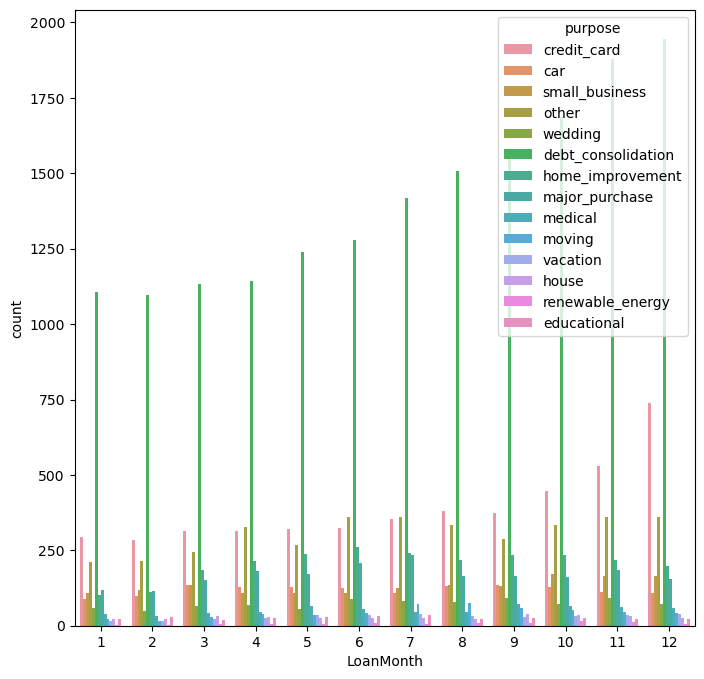

In [113]:
#Checking for a pattern with loan month
plt.figure(figsize=(8, 8))

sns.countplot(x='LoanMonth',hue='purpose', data=GenLoanData)